 ### SEMANA III
 #### MARTES 13 DE JUNIO

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
irisdf = sns.load_dataset("iris")
irisdf.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Ejercicio** Hacer el análisis de estadística descriptiva para la longitud de sépalo (sepal_length) para cada especie flor

Calcular:
* media
* mediana
* cuarqiles
* rango
* desviación estándar
* RIQ

In [3]:
irisdf.species.value_counts()


species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [4]:
irisdf.groupby(["species"]).mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [5]:
irisdf.groupby(["species"]).median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


In [6]:
irisdf.groupby(["species"]).describe()


sepal_length                                              \
                  count   mean       std  min    25%  50%  75%  max   
species                                                               
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal_width         ... petal_length      petal_width         \
                 count   mean  ...          75%  max       count   mean   
species                        ...                                        
setosa            50.0  3.428  ...        1.575  1.9        50.0  0.246   
versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                               
                 std  min  25%  50%  75%  max  
species                                        
setosa      0.105386  0.1  0.2  0.2  0.3  0.6  
versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [7]:
irisdf.groupby(["species"]).quantile(0.25)

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,4.800,3.200,1.4,0.2
versicolor,5.600,2.525,4.0,1.2
virginica,6.225,2.800,5.1,1.8


In [8]:
irisdf.groupby(["species"]).quantile(0.75)

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.2,3.675,1.575,0.3
versicolor,6.3,3.000,4.600,1.5
virginica,6.9,3.175,5.875,2.3


In [9]:
rango = irisdf.groupby(["species"]).max() - irisdf.groupby(["species"]).min()
rango

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,1.5,2.1,0.9,0.5
versicolor,2.1,1.4,2.1,0.8
virginica,3.0,1.6,2.4,1.1


In [10]:
irisdf.groupby(["species"]).std()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,0.352490,0.379064,0.173664,0.105386
versicolor,0.516171,0.313798,0.469911,0.197753
virginica,0.635880,0.322497,0.551895,0.274650


In [11]:
irisdf.groupby("species").agg({"sepal_length":['describe', 'median']})

sepal_length                                              \
               describe                                               
                  count   mean       std  min    25%  50%  75%  max   
species                                                               
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

                         
                 median  
           sepal_length  
species                  
setosa              5.0  
versicolor          5.9  
virginica           6.5

In [12]:
RIQ = irisdf.groupby('species').quantile(0.75) - irisdf.groupby('species').quantile(0.25)
RIQ

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,0.400,0.475,0.175,0.1
versicolor,0.700,0.475,0.600,0.3
virginica,0.675,0.375,0.775,0.5


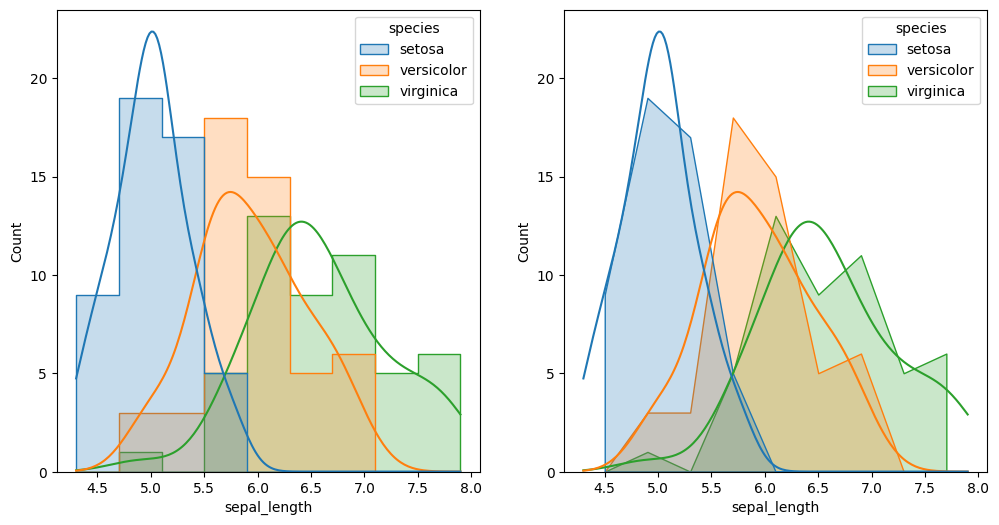

In [13]:
plt.figure( figsize=(12,6))

plt.subplot(1,2,1)
sns.histplot (data=irisdf, x='sepal_length', kde = True, hue = 'species', element="step")

plt.subplot(1,2,2)
sns.histplot (data=irisdf, x='sepal_length', kde = True, hue = 'species', element="poly")

plt.show()

In [14]:
x = np.array([10, 20, 5, 8, 14, 31, 26, 45, 3, 10, 50, 28, 1000000])

In [15]:
x.mean()

76942.30769230769

In [16]:
np.median(x)

20.0

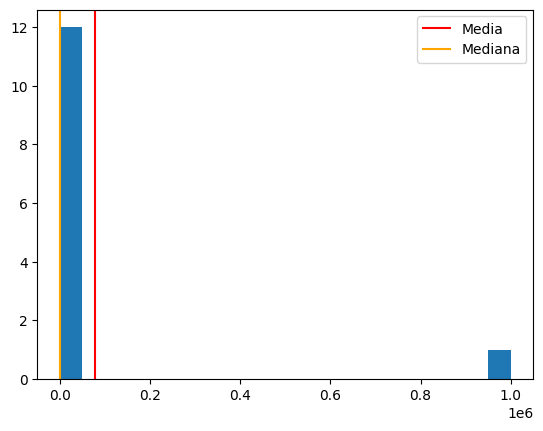

In [17]:
plt.hist(x, bins=20)
plt.axvline(x.mean(), color = 'red', label= 'Media')
plt.axvline(np.median(x), color = 'orange', label= 'Mediana')
plt.legend()
plt.show()


In [18]:
irisdf.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [32]:
setosadf = irisdf[ irisdf.species =="setosa"]
versicolordf = irisdf[ irisdf.species =="versicolor"]
virginicadf = irisdf[ irisdf.species =="virginica"]

versicolordf.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [38]:
print("Setosa:")
print("Promedio:", setosadf.sepal_length.mean().round(2))
print("Mediana:", setosadf.sepal_length.median().round(2))
print("Moda:", setosadf.sepal_length.mode()[0].round(2))
print("Quartil 0.25:", setosadf.sepal_length.quantile(0.25).round(2))
print("Quartil 0.75:", setosadf.sepal_length.quantile(0.75).round(2))

print("\nVersicolor:")
print("Promedio:", versicolordf.sepal_length.mean().round(2))
print("Mediana:", versicolordf.sepal_length.median().round(2))
print("Moda:", versicolordf.sepal_length.mode()[0].round(2))
print("Quartil 0.25:", versicolordf.sepal_length.quantile(0.25).round(2))
print("Quartil 0.75:", versicolordf.sepal_length.quantile(0.75).round(2))

print("\nVirginica:")
print("Promedio:", virginicadf.sepal_length.mean().round(2))
print("Mediana:", virginicadf.sepal_length.median().round(2))
print("Moda:", virginicadf.sepal_length.mode()[0].round(2))
print("Quartil 0.25:", virginicadf.sepal_length.quantile(0.25).round(2))
print("Quartil 0.75:", virginicadf.sepal_length.quantile(0.75).round(2))

Setosa:
Promedio: 5.01
Mediana: 5.0
Moda: 5.0
Quartil 0.25: 4.8
Quartil 0.75: 5.2

Versicolor:
Promedio: 5.94
Mediana: 5.9
Moda: 5.5
Quartil 0.25: 5.6
Quartil 0.75: 6.3

Virginica:
Promedio: 6.59
Mediana: 6.5
Moda: 6.3
Quartil 0.25: 6.22
Quartil 0.75: 6.9


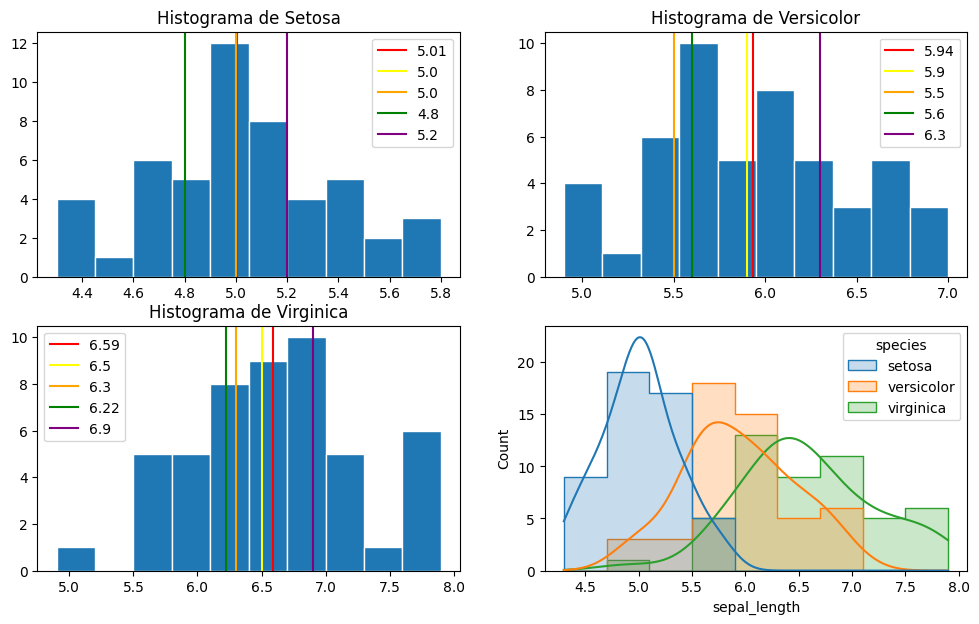

In [64]:
plt.figure( figsize= (12,7))

plt.subplot(2, 2, 1)
plt.title("Histograma de Setosa")
plt.hist(setosadf.sepal_length, bins=10, edgecolor= 'w')
plt.axvline(setosadf.sepal_length.mean(), color= "red", label= f'{setosadf.sepal_length.mean().round(2)}')
plt.axvline(setosadf.sepal_length.median(), color= "yellow", label= f'{setosadf.sepal_length.median().round(2)}')
plt.axvline(setosadf.sepal_length.mode()[0], color= "orange", label= f'{setosadf.sepal_length.mode()[0].round(2)}')
plt.axvline(setosadf.sepal_length.quantile(0.25), color= "green", label= f'{setosadf.sepal_length.quantile(0.25).round(2)}')
plt.axvline(setosadf.sepal_length.quantile(0.75), color= "purple", label= f'{setosadf.sepal_length.quantile(0.75).round(2)}')
plt.legend()


plt.subplot(2, 2, 2)
plt.title("Histograma de Versicolor")
plt.hist(versicolordf.sepal_length, bins=10, edgecolor= 'w')
plt.axvline(versicolordf.sepal_length.mean(), color= "red", label= f'{versicolordf.sepal_length.mean().round(2)}')
plt.axvline(versicolordf.sepal_length.median(), color= "yellow", label= f'{versicolordf.sepal_length.median().round(2)}')
plt.axvline(versicolordf.sepal_length.mode()[0], color= "orange", label= f'{versicolordf.sepal_length.mode()[0].round(2)}')
plt.axvline(versicolordf.sepal_length.quantile(0.25), color= "green", label= f'{versicolordf.sepal_length.quantile(0.25).round(2)}')
plt.axvline(versicolordf.sepal_length.quantile(0.75), color= "purple", label= f'{versicolordf.sepal_length.quantile(0.75).round(2)}')
plt.legend()

plt.subplot(2, 2, 3)
plt.title("Histograma de Virginica")
plt.hist(virginicadf.sepal_length, bins=10, edgecolor= 'w')
plt.axvline(virginicadf.sepal_length.mean(), color= "red", label= f'{virginicadf.sepal_length.mean().round(2)}')
plt.axvline(virginicadf.sepal_length.median(), color= "yellow", label= f'{virginicadf.sepal_length.median().round(2)}')
plt.axvline(virginicadf.sepal_length.mode()[0], color= "orange", label= f'{virginicadf.sepal_length.mode()[0].round(2)}')
plt.axvline(virginicadf.sepal_length.quantile(0.25), color= "green", label= f'{virginicadf.sepal_length.quantile(0.25).round(2)}')
plt.axvline(virginicadf.sepal_length.quantile(0.75), color= "purple", label= f'{virginicadf.sepal_length.quantile(0.75).round(2)}')
plt.legend()

plt.subplot(2,2,4)
sns.histplot (data=irisdf, x='sepal_length', kde = True, hue = 'species', element="step")
plt.show() 


